In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta
%matplotlib inline

In [2]:
%%time
mydata = pd.read_excel('/Users/kaylaxie/Desktop/DSO 562 Fraud Analytics/Project 3/card transactions.xlsx')

CPU times: user 8.03 s, sys: 127 ms, total: 8.16 s
Wall time: 8.84 s


In [3]:
mydata.dtypes

Recordnum                     int64
Cardnum                       int64
Date                 datetime64[ns]
Merchantnum                  object
Merch Description            object
Merchant State               object
Merchant Zip                float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [4]:
mydata.head(10)

,Recordnum,Cardnum,Date,Merchantnum,Merch Description,Merchant State,Merchant Zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
5,6,5142149874,2010-01-01,5509006296254,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0
6,7,5142189277,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0
8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0
9,10,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [5]:
mydata.describe(include='all')

,Recordnum,Cardnum,Date,Merchantnum,Merch Description,Merchant State,Merchant Zip,Transtype,Amount,Fraud
count,96708.000000,9.670800e+04,96708,93333,96708,95513,92052.000000,96708,9.670800e+04,96708.000000
unique,NaN,NaN,365,13090,13125,227,NaN,4,NaN,NaN
top,NaN,NaN,2010-02-28 00:00:00,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN
freq,NaN,NaN,684,9310,1688,11990,NaN,96353,NaN,NaN
first,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2010-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48354.500000,5.142201e+09,NaN,NaN,NaN,NaN,44709.817603,NaN,4.278650e+02,0.010485
std,27917.339254,5.391327e+04,NaN,NaN,NaN,NaN,28376.097348,NaN,1.000847e+04,0.101859
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000
25%,24177.750000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.345000e+01,0.000000


In [6]:
mydata.count()*100/96708

Recordnum            100.000000
Cardnum              100.000000
Date                 100.000000
Merchantnum           96.510113
Merch Description    100.000000
Merchant State        98.764321
Merchant Zip          95.185507
Transtype            100.000000
Amount               100.000000
Fraud                100.000000
dtype: float64

In [7]:
len(mydata['Recordnum'].unique())

96708

### Date Distribution

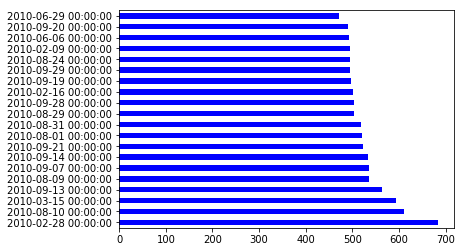

In [10]:
mydata['Date'].value_counts().head(20).plot(kind='barh',color='blue')

In [36]:
print('min is {} and max is {}'.format(mydata['Date'].min(),mydata['Date'].max()))

min is 2010-01-01 00:00:00 and max is 2010-12-31 00:00:00


### Spilting the data into fraudulent and non-fraudulent

In [11]:
goods=mydata[mydata['Fraud']==0]
bads=mydata[mydata['Fraud']==1]

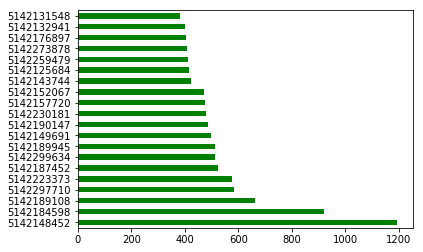

In [15]:
goods['Cardnum'].value_counts().head(20).plot(kind='barh',color='green')

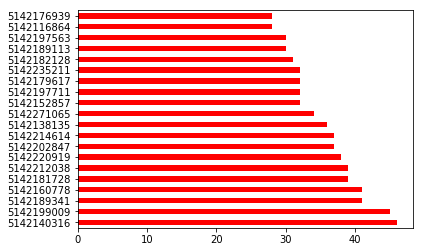

In [16]:
bads['Cardnum'].value_counts().head(20).plot(kind='barh',color='red')

### Weekly Applications -  overall

* assign: Assign new columns to a DataFrame
* set_index: set Date as index
* timedelta: timedelta represents a duration, the difference between two dates or times

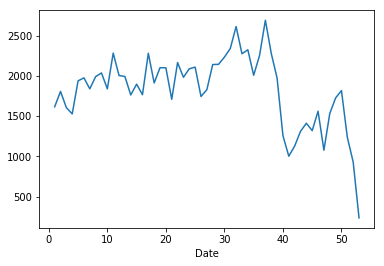

In [38]:
mydata['Date'].groupby(mydata["Date"].dt.week).count().plot(kind="line")

Number of applications in Oct is smallest. Nov - Dec we see a low number too.

### Daily Applications - overall

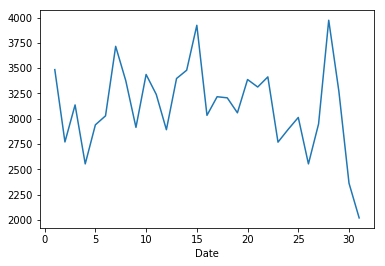

In [39]:
mydata['Date'].groupby(mydata["Date"].dt.day).count().plot(kind="line")

### Monthly Applications

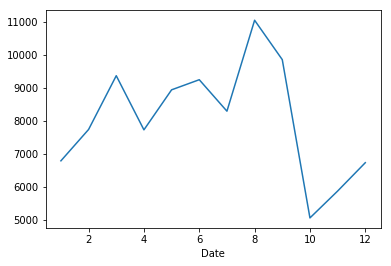

In [40]:
mydata['Date'].groupby(mydata["Date"].dt.month).count().plot(kind="line")

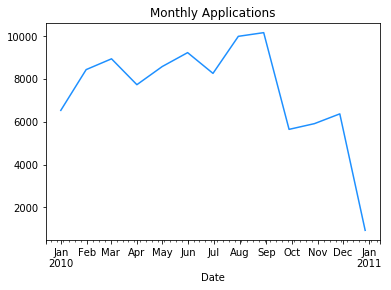

In [12]:
mydata.assign(trx=np.ones(len(mydata.index)))\
    .set_index(mydata['Date'].astype(dt.datetime))\
    .resample(dt.timedelta(days=30))\
    .count()\
    .trx\
    .plot(title='Monthly Applications',color='#1E90FF')

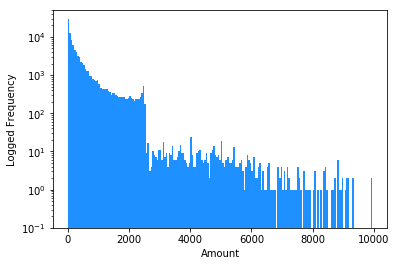

In [27]:
plt.hist(mydata['Amount'].dropna(),bins=range(0,10000,50),color='#1E90FF')
plt.yscale('log')
plt.xlabel('Amount')
plt.ylabel('Logged Frequency')
plt.ylim(ymin=0.1)
plt.show()

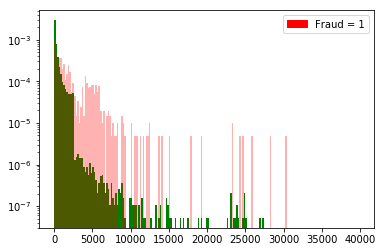

In [40]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Fraud = 1')
green_patch = mpatches.Patch(color='green', label='Fraud = 0')
plt.legend(handles=[red_patch])
plt.hist(goods['Amount'],bins=range(0,40000,200),normed=True,color='green')
plt.hist(bads['Amount'],bins=range(0,40000,200),normed=True,color='red',alpha=0.3)
plt.yscale('log')

(array([  1.99800200e-05,   5.99400599e-05,   1.99800200e-05,
          1.49850150e-05,   2.99700300e-05,   4.99500500e-05,
          1.99800200e-05,   1.89810190e-04,   9.99000999e-06,
          4.99500500e-06,   9.99000999e-06,   1.99800200e-05,
          9.99000999e-06,   5.99400599e-05,   5.39460539e-04,
          1.99800200e-05,   1.74825175e-04,   6.99300699e-05,
          2.99700300e-05,   2.29770230e-04,   1.49850150e-05,
          1.49850150e-05,   5.99400599e-05,   4.99500500e-06,
          1.49850150e-05,   1.99800200e-05,   4.99500500e-05,
          6.49350649e-05,   2.99700300e-05,   1.39860140e-04,
          2.99700300e-05,   0.00000000e+00,   1.39860140e-04,
          0.00000000e+00,   1.19880120e-04,   2.14785215e-04,
          1.99800200e-05,   2.99700300e-05,   9.99000999e-06,
          4.99500500e-05,   2.49750250e-05,   1.99800200e-05,
          1.04895105e-04,   5.99400599e-05,   1.99800200e-05,
          2.49750250e-05,   1.49850150e-05,   0.00000000e+00,
        

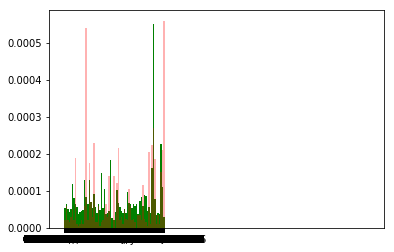

In [44]:
plt.hist(goods['Merchantnum'],bins=range(0,40000,200),normed=True,color='green')
plt.hist(bads['Merchantnum'],bins=range(0,40000,200),normed=True,color='red',alpha=0.3)

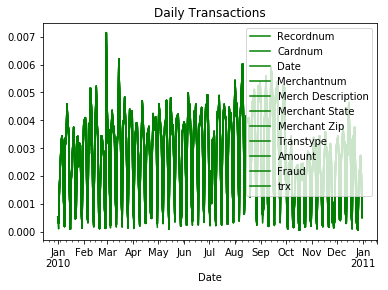

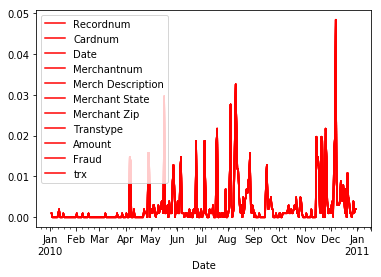

In [57]:
ngoods=len(goods)
nbads=len(bads)
goods_series=goods.assign(trx=np.ones(len(goods.index)))\
    .set_index(goods['Date'].astype(dt.datetime))\
    .resample(dt.timedelta(days=1)).count()
  
norm_goods_series=goods_series/ngoods

bads_series=bads.assign(trx=np.ones(len(bads.index)))\
    .set_index(bads['Date'].astype(dt.datetime))\
    .resample(dt.timedelta(days=1)).count()
  
norm_bads_series=bads_series/nbads

Text(0.5,1,'Daily Applications')

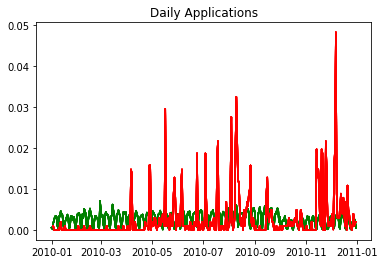

In [60]:
plt.plot(norm_goods_series,color='green')
plt.plot(norm_bads_series,color='red')
plt.title('Daily Applications')

Seems that fraudulent applications spike around the end of year 2010

Text(0.5,1,'Weekly Applications')

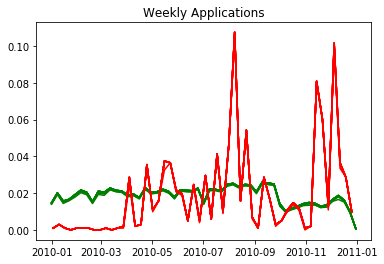

In [66]:
goods_series7=goods.assign(trx=np.ones(len(goods.index)))\
    .set_index(goods['Date'].astype(dt.datetime))\
    .resample(dt.timedelta(days=7)).count()
  
norm_goods_series7=goods_series7/ngoods

bads_series7=bads.assign(trx=np.ones(len(bads.index)))\
    .set_index(bads['Date'].astype(dt.datetime))\
    .resample(dt.timedelta(days=7)).count()
  
norm_bads_series7=bads_series7/nbads

plt.plot(norm_goods_series7,color='green')
plt.plot(norm_bads_series7,color='red')
plt.title('Weekly Applications')

Text(0.5,1,'Monthly Applications')

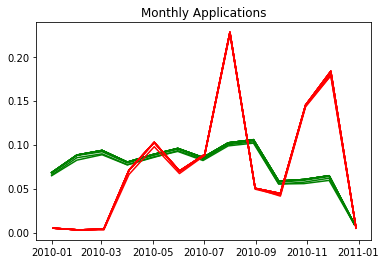

In [67]:
goods_series30=goods.assign(trx=np.ones(len(goods.index)))\
    .set_index(goods['Date'].astype(dt.datetime))\
    .resample(dt.timedelta(days=30)).count()
  
norm_goods_series30=goods_series30/ngoods

bads_series30=bads.assign(trx=np.ones(len(bads.index)))\
    .set_index(bads['Date'].astype(dt.datetime))\
    .resample(dt.timedelta(days=30)).count()
  
norm_bads_series30=bads_series30/nbads

plt.plot(norm_goods_series30,color='green')
plt.plot(norm_bads_series30,color='red')
plt.title('Monthly Applications')